In [37]:
#!pip3 install numpy
#!pip3 install pandas
#!pip3 install matplotlib
#!pip3 install seaborn
#!pip3 install scikit-learn
#!pip3 install tk
#!apt-get install python3-tk

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
#Load the data set
df = pd.read_csv("eda/mobile_crash_data_v1-2.csv")
print(df)

       App_Name  CPU_Usage  Memory_Usage  Battery_Level  Temperature  \
0       Netflix  82.059179     92.313822     100.000000    63.173305   
1       Twitter  39.226704    100.000000      34.584389    45.315528   
2       Discord  44.755186     59.324264      70.999879    44.118152   
3         Slack  73.000172     53.898257      89.297478    60.087698   
4        Amazon  35.775476     94.990916      63.738677    38.053615   
...         ...        ...           ...            ...          ...   
9995  Instagram  48.511014     55.400886      24.931910    50.573463   
9996   WhatsApp  66.901102     44.103486      77.673902    59.279814   
9997   WhatsApp  36.968678    100.000000      95.358833    41.378272   
9998    Discord  21.313710     87.210100      61.614632    32.118371   
9999  Instagram  88.487284     69.893763      64.428965    69.099167   

      Disk_Space  Network_Signal  App_Version  Error_Logs Device_Model  \
0     250.118842       76.883998          1.0           0    

In [40]:
# Summary statistics - This will do find mean and Quantiles finding central tendencies and dispersion
print("\nSummary Statistics:")
print(df.describe(include='all'))


Summary Statistics:
       App_Name    CPU_Usage  Memory_Usage  Battery_Level  Temperature  \
count     10000  9800.000000   9608.000000   10000.000000  9800.000000   
unique       15          NaN           NaN            NaN          NaN   
top     Discord          NaN           NaN            NaN          NaN   
freq        701          NaN           NaN            NaN          NaN   
mean        NaN    50.054918     70.462252      59.208385    50.039497   
std         NaN    28.785568     26.936849      28.561929    17.582422   
min         NaN     0.011864      0.000000       0.000000    13.215221   
25%         NaN    25.595629     49.795454      35.528953    35.183157   
50%         NaN    50.183031     74.519693      60.136686    50.083056   
75%         NaN    74.654506     99.388729      84.733938    64.985414   
max         NaN    99.989267    100.000000     100.000000    87.610653   

          Disk_Space  Network_Signal   App_Version    Error_Logs Device_Model  \
count   1

In [41]:
# Checking for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
App_Name                        0
CPU_Usage                     200
Memory_Usage                  392
Battery_Level                   0
Temperature                   200
Disk_Space                      0
Network_Signal                  0
App_Version                     0
Error_Logs                      0
Device_Model                    0
Session_Time                    0
Num_App_Crashes                 0
Duration_Since_Last_Charge      0
App_Usage_Level                 0
Crash_Label                     0
dtype: int64


In [53]:
# Identify outliers in all numeric coloumns
numeric_cols = df.select_dtypes(include=np.number).columns
outliers = {}
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    print(f"\n{col}, Outliers Range[lb, ub] => [{lower_bound},  {upper_bound}] ")
    print(f"=====================================================================")
    filtered_df  = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(filtered_df.iloc[0:5])
    print(f"\n")


App_Name, Outliers Range[lb, ub] => [-9.0,  23.0] 
Empty DataFrame
Columns: [App_Name, CPU_Usage, Memory_Usage, Battery_Level, Temperature, Disk_Space, Network_Signal, App_Version, Error_Logs, Device_Model, Session_Time, Num_App_Crashes, Duration_Since_Last_Charge, App_Usage_Level, Crash_Label]
Index: []



CPU_Usage, Outliers Range[lb, ub] => [-46.113749999999996,  146.31625] 
Empty DataFrame
Columns: [App_Name, CPU_Usage, Memory_Usage, Battery_Level, Temperature, Disk_Space, Network_Signal, App_Version, Error_Logs, Device_Model, Session_Time, Num_App_Crashes, Duration_Since_Last_Charge, App_Usage_Level, Crash_Label]
Index: []



Memory_Usage, Outliers Range[lb, ub] => [-20.990000000000002,  170.09] 
Empty DataFrame
Columns: [App_Name, CPU_Usage, Memory_Usage, Battery_Level, Temperature, Disk_Space, Network_Signal, App_Version, Error_Logs, Device_Model, Session_Time, Num_App_Crashes, Duration_Since_Last_Charge, App_Usage_Level, Crash_Label]
Index: []



Battery_Level, Outliers Range[

In [43]:
# Impute missing values by replacing with mean
df['CPU_Usage']=df['CPU_Usage'].fillna(df['CPU_Usage'].mean())

df['Memory_Usage']=df['Memory_Usage'].fillna(df['Memory_Usage'].median())

df['Temperature']=df['Temperature'].ffill()


print("\nMissing Values:")
print(df.isnull().sum())


df = df.round(2)
print(df)


Missing Values:
App_Name                      0
CPU_Usage                     0
Memory_Usage                  0
Battery_Level                 0
Temperature                   0
Disk_Space                    0
Network_Signal                0
App_Version                   0
Error_Logs                    0
Device_Model                  0
Session_Time                  0
Num_App_Crashes               0
Duration_Since_Last_Charge    0
App_Usage_Level               0
Crash_Label                   0
dtype: int64
       App_Name  CPU_Usage  Memory_Usage  Battery_Level  Temperature  \
0       Netflix      82.06         92.31         100.00        63.17   
1       Twitter      39.23        100.00          34.58        45.32   
2       Discord      44.76         59.32          71.00        44.12   
3         Slack      73.00         53.90          89.30        60.09   
4        Amazon      35.78         94.99          63.74        38.05   
...         ...        ...           ...            ...   

In [45]:
# Data type information
print("\nData Types:")
print(df.dtypes)


Data Types:
App_Name                       object
CPU_Usage                     float64
Memory_Usage                  float64
Battery_Level                 float64
Temperature                   float64
Disk_Space                    float64
Network_Signal                float64
App_Version                   float64
Error_Logs                      int64
Device_Model                   object
Session_Time                  float64
Num_App_Crashes                 int64
Duration_Since_Last_Charge    float64
App_Usage_Level                object
Crash_Label                   float64
dtype: object


In [46]:
# 1. Distance binning
# Formula -> interval = (max-min) / Number of Bins
# Let us consider the 'Battery Level' continuous value column for binning
min_value = df['Battery_Level'].min()
max_value = df['Battery_Level'].max()
print(min_value)
print(max_value)

# Suppose the bin size is 5
# linspace returns evenly spaced numbers over a specified interval. 
# Returns num evenly spaced samples, calculated over the interval [start, stop].
bins = np.linspace(min_value,max_value,5)
print(bins)

0.0
100.0
[  0.  25.  50.  75. 100.]


In [47]:
labels = ['Very Low', 'Low', 'Moderate', 'Sufficient'];

# We can use the cut() function to convert the numeric values of the column Age into the categorical values.
# We need to specify the bins and the labels.
df['Battery_Level'] = pd.cut(df['Battery_Level'], bins=bins, labels=labels, include_lowest=True)
print(df['Battery_Level'])



0       Sufficient
1              Low
2         Moderate
3       Sufficient
4         Moderate
           ...    
9995      Very Low
9996    Sufficient
9997    Sufficient
9998      Moderate
9999      Moderate
Name: Battery_Level, Length: 10000, dtype: category
Categories (4, object): ['Very Low' < 'Low' < 'Moderate' < 'Sufficient']


In [48]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()  
df['App_Usage_Level']=le.fit_transform(df['App_Usage_Level'])
print(df['App_Usage_Level'])

df['Device_Model']=le.fit_transform(df['Device_Model'])
print(df['Device_Model'])

df['App_Name']=le.fit_transform(df['App_Name'])
print(df['App_Name'])

df['Battery_Level']=le.fit_transform(df['Battery_Level'])
print(df['Battery_Level'])


0       1
1       2
2       2
3       0
4       0
       ..
9995    1
9996    2
9997    0
9998    1
9999    1
Name: App_Usage_Level, Length: 10000, dtype: int64
0       1
1       1
2       1
3       1
4       1
       ..
9995    0
9996    0
9997    1
9998    0
9999    1
Name: Device_Model, Length: 10000, dtype: int64
0        6
1       11
2        1
3        7
4        0
        ..
9995     4
9996    13
9997    13
9998     1
9999     4
Name: App_Name, Length: 10000, dtype: int64
0       2
1       0
2       1
3       2
4       1
       ..
9995    3
9996    2
9997    2
9998    1
9999    1
Name: Battery_Level, Length: 10000, dtype: int64


In [49]:
# Data type information
print("\nData Types:")
print(df.dtypes)


Data Types:
App_Name                        int64
CPU_Usage                     float64
Memory_Usage                  float64
Battery_Level                   int64
Temperature                   float64
Disk_Space                    float64
Network_Signal                float64
App_Version                   float64
Error_Logs                      int64
Device_Model                    int64
Session_Time                  float64
Num_App_Crashes                 int64
Duration_Since_Last_Charge    float64
App_Usage_Level                 int64
Crash_Label                   float64
dtype: object


Pearson correlation: 0.953


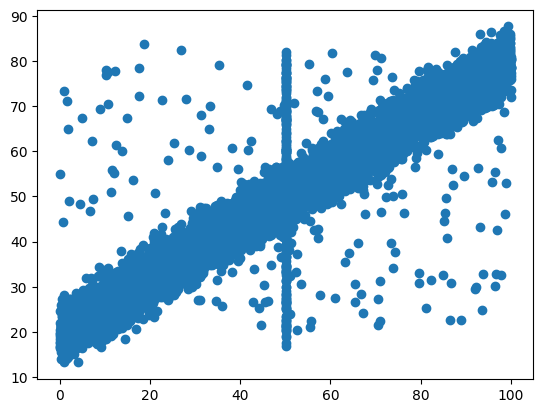

In [50]:
from scipy.stats import pearsonr
# Convert dataframe into series
list1 = df['CPU_Usage']
list2 = df['Temperature']
 
# Apply the pearsonr()
corr, _ = pearsonr(list1, list2)
print('Pearson correlation: %.3f' % corr)

# Pearson correlation: 0.205 (Moderate Positive correlation)
# Interpretaton:
# As the CPU usage of the device increases, memory also increases

# Draw a Plot of the relationship
# 'CPU' on the X Axis and 'Memory' on the Y axis
from matplotlib import pyplot
pyplot.scatter(list1, list2)
pyplot.show()

In [51]:
# Normalize Numerical Data
# copy the data
df_min_max_scaled = df.copy()

# Loop through each numerical column
for column in df_min_max_scaled.select_dtypes(include=['int64', 'float64']).columns:
    min_val = df[column].min()
    max_val = df[column].max()
    df_min_max_scaled[column] = (df[column] - min_val) / (max_val - min_val)

# Display the normalized DataFrame
print("\nNormalized DataFrame:")
print(df_min_max_scaled)


Normalized DataFrame:
      App_Name  CPU_Usage  Memory_Usage  Battery_Level  Temperature  \
0     0.428571   0.820664        0.9231       0.666667     0.671461   
1     0.785714   0.392278        1.0000       0.000000     0.431510   
2     0.071429   0.447590        0.5932       0.333333     0.415378   
3     0.500000   0.730046        0.5390       0.666667     0.630058   
4     0.000000   0.357772        0.9499       0.333333     0.333781   
...        ...        ...           ...            ...          ...   
9995  0.285714   0.485097        0.5540       1.000000     0.502084   
9996  0.928571   0.669034        0.4410       0.666667     0.619169   
9997  0.928571   0.369674        1.0000       0.666667     0.378546   
9998  0.071429   0.213043        0.8721       0.333333     0.254066   
9999  0.285714   0.884977        0.6989       0.333333     0.751176   

      Disk_Space  Network_Signal  App_Version  Error_Logs  Device_Model  \
0       0.488512        0.768877          0.0    

In [52]:
from tkinter import TRUE 
# Correlation Matrix - Internally uses Pearson Correlation
cor = df_min_max_scaled.corr()

# Plotting Heatmap
plt.figure(figsize = (10,6))
#sns.heatmap(cor, annot=True)
sns.heatmap(
    cor,
    annot=True,              # Annotate cells with their values
    fmt=".2f",              # Format for annotation
    cmap='coolwarm',        # Color map
    cbar=True,              # Show color bar
    linewidths=.5,          # Lines between cells
    linecolor='black',       # Color of the lines
    square=False,            # Make cells square-shaped
    xticklabels=True,       # Show x-tick labels
    yticklabels=True        # Show y-tick labels
)
plt.show()

ModuleNotFoundError: No module named '_tkinter'